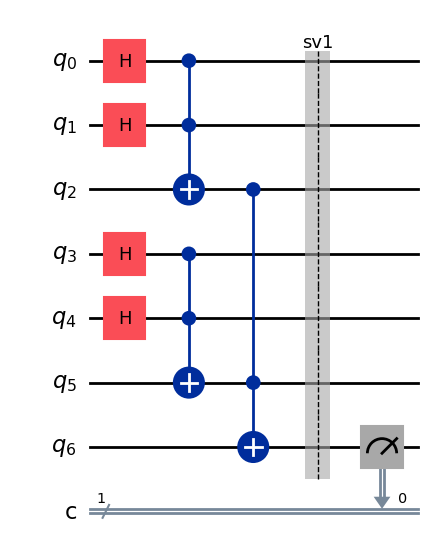

<IPython.core.display.Math object>

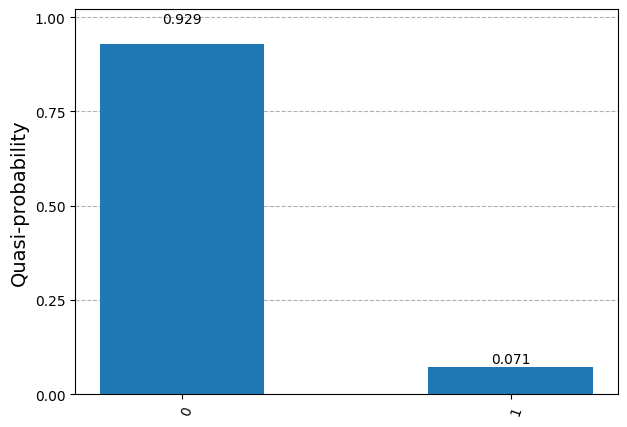

In [13]:
# quantum_circuit3.ipynb

from IPython.display import display
from qis102_utils import as_latex
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_distribution,
)
from qiskit_aer import AerSimulator

qc = QuantumCircuit(7, 1)
qc.h(0)
qc.h(1)
qc.h(3)
qc.h(4)
qc.ccx(0, 1, 2)
qc.ccx(3, 4, 5)
qc.ccx(2, 5, 6)
qc.save_statevector("sv1")
qc.measure(6, 0)

display(qc.draw(output="mpl"))
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=1024).result()

sv1 = result.data(0)["sv1"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))

counts = result.get_counts(qc)
display(plot_distribution(counts))

In [ ]:
# The reason why the probability for 1 t occur is because the ccx (ccnot or and) gate will not be 1 unless all h gates produce a 1. You can test this by taking out one h gate then up to three.
# The results will have 100% for 0 because the "and" gate will give out 0 if both of the h gates dont have 1 values
